In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

df = pd.read_csv('who life expectancy 2022 (3) (version 1).xlsb (3).csv')



In [2]:
df.columns.values.tolist()

['Country',
 'Total populationa (000s) / Male',
 'Total populationa (000s) / Female',
 'Total populationa (000s) / Both sexes',
 'Life expectancy at birthb (years) / Male',
 'Life expectancy at birthb (years) / Female',
 'Life expectancy at birthb (years) / Both sexes',
 'Healthy life expectancy at birthb (years) / Male',
 'Healthy life expectancy at birthb (years) / Female',
 'Healthy life expectancy at birthb (years) / Both sexes',
 'Maternal mortality ratioc (per 100 000 live births)',
 'Proportion of births attended by skilled health personneld (%)',
 'Under-five mortality ratee (per 1000 live births)',
 'Neonatal mortality ratee (per 1000 live births)',
 'New HIV infectionsf (per 1000 uninfected population)',
 'Tuberculosis incidenceg (per 100 000 population)',
 'Malaria incidenceh (per 1000 population at risk)',
 'Hepatitis B surface antigen (HBsAg) prevalence among children under 5 yearsi (%)',
 'Reported number of people requiring interventions against NTDsj',
 'Probability of 

In [3]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
#print(df)
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
listOfValues = df.columns.values.tolist()
for i in range(1, 64):
    df[listOfValues[i]] = imputer.fit_transform(df[[listOfValues[i]]])



In [4]:
from sklearn.model_selection import train_test_split

numeric_df = df.select_dtypes(include=['float64', 'int64'])

X = numeric_df[['UHC: Service coverage indexo', 
                'Age-standardized mortality rate attributed to household and ambient air pollutionq  (per 100 000 population) ', 
                'Proportion of population with primary reliance on clean fuels and technologyag (%)', 
                'Proportion of ever-partnered women and girls aged 15–49 years subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 monthsac (%) ', 
                'Prevalence of anaemia in women of reproductive age (15–49 years)ab  (%)','Density of medical doctorsw (per 10 000 population) ',
                'Maternal mortality ratioc (per 100 000 live births)',
                'Neonatal mortality ratee (per 1000 live births)',
                'Probability of dying from any of CVD, cancer, diabetes, CRD between age 30 and exact age 70k (%)',
                'Mortality rate attributed to exposure to unsafe WASH servicesr (per 100 000 population)',
                'Mortality rate from unintentional poisoningk (per 100 000 population)',
               ]]  # Replace with the actual names of your variables
y = numeric_df['Healthy life expectancy at birthb (years) / Both sexes']  # Replace with 

Proportion of ever-partnered women and girls aged 15–49 years subjected to physical and/or sexual violence by a current or former intimate partner in the previous 12 monthsac (%) 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Intercept of Regression 	: b =  72.68634510433928
Coefficients of Regression 	: a =  [ 0.01292635  0.00718495  0.00336051 -0.05108634 -0.03373749  0.0319135
 -0.00537771 -0.11930681 -0.33963664 -0.0311517  -0.53439029]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9336681322041985
Mean Squared Error (MSE) 	: 2.4588692512676826

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9403246021094097
Mean Squared Error (MSE) 	: 2.030504930678013



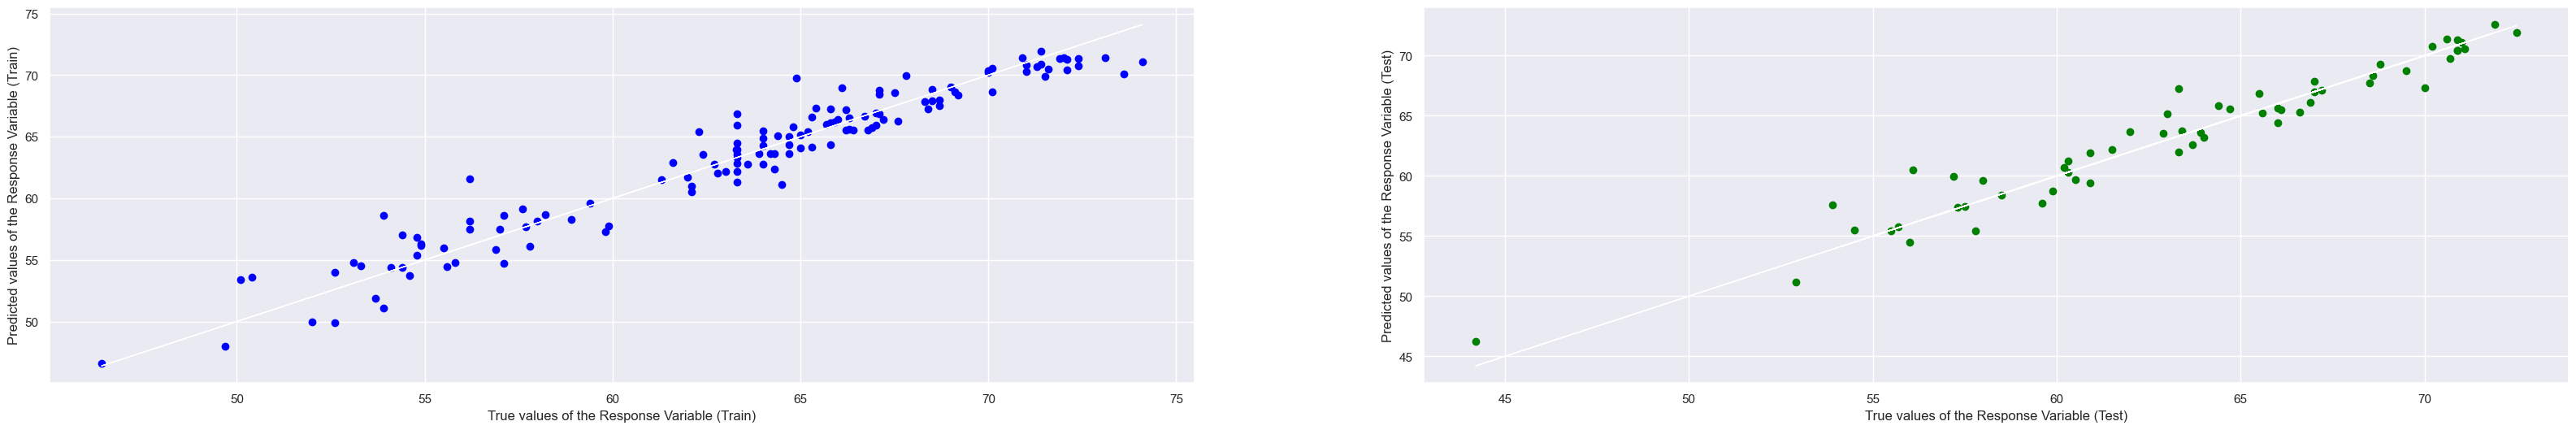

In [6]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train) 
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(40, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()